In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np
import pandas as pd
import csv

# imports csv as a dataframe
df = pd.read_csv("Amazon_Unlocked_Mobile_without_duplicates.csv")

/usr/local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# list of names and misspellings of companies
duplicates = [["Samsung", "samsung", "SAMSUNG", "Samsung Korea LTD"], ["BLU"], ["Apple"], ["LG", "LG Electronics", "LG Electronics MobileComm USA"], ["BlackBerry", "Blackberry"], ["Nokia"], ["Motorola"], ["HTC"], ["CNPGD"], ["Sony", "Sony Ericsson Mobile", "Sony Ericsson"], ["OtterBox"], ["Posh Mobile"], ["Huawei", "HUAWEI"], ["ZTE"], ["Polaroid"], ["Alcatel"], ["Asus", "ASUS Computers", "ASUS"], ["Ultrabox"], ["FIGO"], ["verykool"], ["Lenovo"], ["Casio"], ["RCA"], ["Amazon","Amazon.com, LLC *** KEEP PORules ACTIVE ***"], ["Pantech"], ["Star"], ["Plum"], ["Jitterbug"], ["Microsoft"], ["Padgene"], ["CT-Miami LLC"], ["SKY Devices"], ["Yezz"], ["Sudroid"], ["Turbosight LLD"], ["JoyGeek"]]
brandNames = df["Brand Name"].tolist()
for i in duplicates:
    for j in i:
        if j not in brandNames:
            print("NOT TRUE")

In [3]:
# makes a list of only correct brand names
undup = []
for i in duplicates:
    undup.append(i[0])

In [4]:
# a function that replaces the misspelled brands with correct brand names
def replace(brand):
    for a in duplicates:
        for e in a:
            if brand == e:
                return(a[0])
    
# puts brand name column of dataframe in list 
temp = df["Brand Name"].tolist()

# replaces misspelled brand names with correctly spelled brand names
for i in range(len(temp)):
    temp[i] = replace(temp[i])

# puts correctly spelled brand list into dataframe
df["Brand Name"] = temp

In [5]:
rev = df["Reviews"].to_list()
# fuction to return the brand mentioned in the review
def brandFinder(review):
    #review.lower()
    n = 0
    brandFound = []
    for b in undup:
        if b.lower() in review.lower():
            brandFound.append(b)
    brandFoundFinal = []
    for i in brandFound:
        if i not in brandFoundFinal:
            brandFoundFinal.append(i)
    if len(brandFoundFinal) == 1:
        return(brandFoundFinal[0])

In [6]:
# finding the locations of the NaN brands in the list
brandList = df["Brand Name"].to_list()
# saving a list of the reviews to look for the brands 
reviewList = df["Reviews"].to_list()


# makes a list with all the 
nanLocationList = []
for i in range(len(brandList)):
    if brandList[i] == None:
        nanLocationList.append(i)


z = 0
for l in nanLocationList:
    try:
        brandList[l] = brandFinder(reviewList[l])
    except:
        z = 0
df["Brand Name"] = brandList

In [7]:
# bigCompanies and smallCompanies exclude companies that do not manufacture phones and companeies with fewer tahn 500 reviews
bigCompanies = {'Samsung', 'BLU', 'Apple', 'LG', 'BlackBerry', 'Nokia', 'Motorola', 'Posh Mobile', 'HTC', 'ZTE', 'RCA', 'Sony', 'Huawei', 'Asus', 'Amazon', 'Alcatel', 'Casio', 'Lenovo', 'Microsoft'}
smallCompanies = {'CNPGD', 'Polaroid', 'FIGO', 'verykool', 'Pantech', 'Star', 'Plum', 'Jitterbug', 'Padgene'}
allCompanies = {'Samsung', 'BLU', 'Apple', 'LG', 'BlackBerry', 'Nokia', 'Motorola', 'Posh Mobile', 'HTC', 'ZTE', 'RCA', 'Sony', 'Huawei', 'Asus', 'Amazon', 'Alcatel', 'Casio', 'Lenovo', 'Microsoft', 'CNPGD', 'Polaroid', 'FIGO', 'verykool', 'Pantech', 'Star', 'Plum', 'Jitterbug', 'Padgene'}


In [8]:
# puts brand name, price, rating, review, and review votes into lists
brandName = df["Brand Name"].to_list()
price = df["Price"].to_list()
rating = df["Rating"].to_list()
reviews = df["Reviews"].to_list()
reviewVotes = df["Review Votes"].to_list()

# fuction to pop item of specific location from all lists
def multiPop(location):
    brandName.pop(location)
    price.pop(location)
    rating.pop(location)
    reviews.pop(location)
    reviewVotes.pop(location)

# makse a list of locations to pop so indexes dont get screwed up
toPop = []

# itterates through brandName and multiPops brands that are not in allCompanies and NaNs
for brand in range(len(brandName)):
    if brandName[brand] in allCompanies:
        pass
    else:
        toPop.append(brand)

toPop.reverse()
for i in toPop:
    multiPop(i)

# makes empty list for big or small company identifier to go in
size = []

# itterates through brandName and checks if company is big or small and adds big/small to size
for brand in range(len(brandName)):
    if brandName[brand] in bigCompanies:
        size.append("BIG")
    elif brandName[brand] in smallCompanies:
        size.append("SMALL")
    else:
        print("We not happy")


# makes new dataframe with lists
dff = pd.DataFrame(list(zip(brandName, price, rating, reviews, reviewVotes, size)), columns= ['Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes', 'Size'])


In [9]:
print(dff)

       Brand Name   Price  Rating  \
0         Samsung  199.99       5   
1         Samsung  199.99       4   
2         Samsung  199.99       5   
3         Samsung  199.99       4   
4         Samsung  199.99       4   
...           ...     ...     ...   
336071    Samsung   79.95       5   
336072    Samsung   79.95       3   
336073    Samsung   79.95       5   
336074    Samsung   79.95       3   
336075    Samsung   79.95       4   

                                                  Reviews  Review Votes Size  
0       I feel so LUCKY to have found this used (phone...           1.0  BIG  
1       nice phone, nice up grade from my pantach revu...           0.0  BIG  
2                                            Very pleased           0.0  BIG  
3       It works good but it goes slow sometimes but i...           0.0  BIG  
4       Great phone to replace my lost phone. The only...           0.0  BIG  
...                                                   ...           ...  ...  
33

In [10]:
print(dff.isnull().sum())
print('---------')
df_ev = dff.dropna()   # Creating new dataframe without null values
print(df_ev.isnull().sum())

Brand Name          0
Price            3812
Rating              0
Reviews            43
Review Votes    10211
Size                0
dtype: int64
---------
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
Size            0
dtype: int64


In [11]:
df_ev['Reviews'] = df_ev['Reviews'].str.replace('[^\w\s]','')
df_ev['Reviews'] = df_ev['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
display(df_ev)

<ipython-input-11-8b6f591efd8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['Reviews'] = df_ev['Reviews'].str.replace('[^\w\s]','')
<ipython-input-11-8b6f591efd8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['Reviews'] = df_ev['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,Brand Name,Price,Rating,Reviews,Review Votes,Size
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG
2,Samsung,199.99,5,very pleased,0.0,BIG
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG
...,...,...,...,...,...,...
336071,Samsung,79.95,5,another great deal great price,0.0,BIG
336072,Samsung,79.95,3,ok,0.0,BIG
336073,Samsung,79.95,5,passes every drop test onto porcelain tile,0.0,BIG
336074,Samsung,79.95,3,i returned it because it did not meet my needs...,0.0,BIG


In [12]:
df_ev.sample(n = 200)

,Brand Name,Price,Rating,Reviews,Review Votes,Size
3945,Apple,33.00,1,i paid 135 for this phone and when i received ...,1.0,BIG
189705,LG,151.86,5,great phone,1.0,BIG
23945,Apple,199.00,5,i got this for my husband and he absolutely lo...,1.0,BIG
2701,Apple,115.00,5,great experience as expected,0.0,BIG
9699,Apple,129.99,5,excelent,0.0,BIG
...,...,...,...,...,...,...
7491,Apple,75.00,4,excelent product,0.0,BIG
56335,Apple,769.99,1,i received a dummy toy phone this phone is a f...,28.0,BIG
282650,Samsung,168.68,5,there isnt much to say from blackberry 9700 to...,0.0,BIG
71558,BlackBerry,104.95,4,works great,0.0,BIG


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


df_ev['Reviews'].apply(lambda x: [item for item in x if item not in stop])

#df_ev['Cleaned'] = df_ev['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df_ev.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/EvanDietrich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Brand Name,Price,Rating,Reviews,Review Votes,Size
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG
2,Samsung,199.99,5,very pleased,0.0,BIG
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG


In [14]:
df_ev['Reviews'] = df_ev['Reviews'].str.replace('\d+', '')
df_ev.head()

<ipython-input-14-e20c92b7e6c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['Reviews'] = df_ev['Reviews'].str.replace('\d+', '')


,Brand Name,Price,Rating,Reviews,Review Votes,Size
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG
2,Samsung,199.99,5,very pleased,0.0,BIG
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG


In [15]:
df_ev['Cleaned'] = df_ev['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_ev.head()


<ipython-input-15-0aaf587ec21c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev['Cleaned'] = df_ev['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG,feel lucky found used phone us used hard phone...
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG,nice phone nice grade pantach revue clean set ...
2,Samsung,199.99,5,very pleased,0.0,BIG,pleased
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG,works good goes slow sometimes good phone love
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG,great phone replace lost phone thing volume bu...


In [16]:
df_ev_big = df_ev[df_ev.Size == 'BIG']
df_ev_small = df_ev[df_ev.Size == 'SMALL']

In [17]:
print("Total reviews is: " + str(len(df_ev.index)))

print("Number of big company reviews (aka rows in df_ev_big) is: " + str(len(df_ev_big.index)))
print("Number of small company reviews (aka rows in df_ev_big) is: " + str(len(df_ev_small.index)))


Total reviews is: 322136
Number of big company reviews (aka rows in df_ev_big) is: 300485
Number of small company reviews (aka rows in df_ev_big) is: 21651


In [18]:
df_ev_small.head()

,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
110,Star,269.10,2,when i got phone it wouldnt work i took it to ...,0.0,SMALL,got phone wouldnt work took verizon store batt...
113,Star,79.99,3,the charger did not work my parents started us...,0.0,SMALL,charger work parents started using cable direc...
114,Star,79.99,3,the only reason i gave it a star is because i...,1.0,SMALL,reason gave star little hard elder person use
115,Star,79.99,5,this phone was purchased for my father i reall...,15.0,SMALL,phone purchased father really like features pr...
116,Star,59.99,4,this is a great simple phone which is getting ...,9.0,SMALL,great simple phone getting harder harder find ...


In [19]:
df_ev_big.head()

,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG,feel lucky found used phone us used hard phone...
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG,nice phone nice grade pantach revue clean set ...
2,Samsung,199.99,5,very pleased,0.0,BIG,pleased
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG,works good goes slow sometimes good phone love
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG,great phone replace lost phone thing volume bu...


In [20]:
print("Average rating for a small company phone is: " + str(df_ev_small["Rating"].mean()))
print("Average rating for a big company phone is: " + str(df_ev_big["Rating"].mean()))

Average rating for a small company phone is: 3.1498314165627455
Average rating for a big company phone is: 3.861081251975972


In [21]:
import nltk
nltk.download('wordnet')
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df_ev_small['Cleaned'] = [lemmatizer.lemmatize(row) for row in df_ev_small['Cleaned']]
df_ev_small.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/EvanDietrich/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-21-817cbe591b08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev_small['Cleaned'] = [lemmatizer.lemmatize(row) for row in df_ev_small['Cleaned']]


,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
110,Star,269.10,2,when i got phone it wouldnt work i took it to ...,0.0,SMALL,got phone wouldnt work took verizon store batt...
113,Star,79.99,3,the charger did not work my parents started us...,0.0,SMALL,charger work parents started using cable direc...
114,Star,79.99,3,the only reason i gave it a star is because i...,1.0,SMALL,reason gave star little hard elder person use
115,Star,79.99,5,this phone was purchased for my father i reall...,15.0,SMALL,phone purchased father really like features pr...
116,Star,59.99,4,this is a great simple phone which is getting ...,9.0,SMALL,great simple phone getting harder harder find ...


In [22]:

df_ev_big['Cleaned'] = [lemmatizer.lemmatize(row) for row in df_ev_big['Cleaned']]
df_ev_big.head()

<ipython-input-22-265645ee2e93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ev_big['Cleaned'] = [lemmatizer.lemmatize(row) for row in df_ev_big['Cleaned']]


,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
0,Samsung,199.99,5,i feel so lucky to have found this used phone ...,1.0,BIG,feel lucky found used phone us used hard phone...
1,Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,BIG,nice phone nice grade pantach revue clean set ...
2,Samsung,199.99,5,very pleased,0.0,BIG,pleased
3,Samsung,199.99,4,it works good but it goes slow sometimes but i...,0.0,BIG,works good goes slow sometimes good phone love
4,Samsung,199.99,4,great phone to replace my lost phone the only ...,0.0,BIG,great phone replace lost phone thing volume bu...


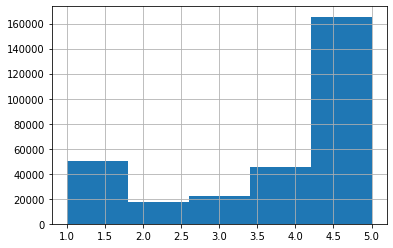

In [23]:
hist = df_ev_big["Rating"].hist(bins=5)

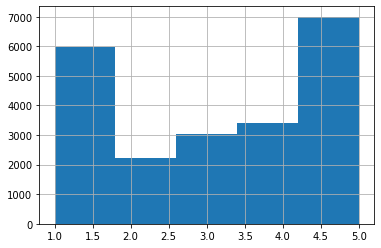

In [24]:
hist = df_ev_small["Rating"].hist(bins=5)

In [ ]:
# TO-DO <NOW>
# drop 3's from ev_big and ev_small.... 
## either add new column with "1" for 4's and 5's.... and "0" for 1's and 2's
## then redo the count distribution (there will be less rows in the small company df now )

In [25]:
# ToDO: Take max. # from small company batch out of large company batch at random (use sample n = # built-ins perhaps)
# ..... then: train/test/split... also a built-in

# completed yesterday


In [26]:
# new dataframe with just small and new dataframe with just big (same length)
#makes new sample dataframes of same size 
df_small_sample = df_ev_small.sample(n=len(df_ev_small["Size"].to_list()))
df_big_sample = df_ev_big.sample(n=len(df_ev_small["Size"].to_list()))

# makes a new dataframe with both dataframes in them
df_both_sample = pd.concat([df_small_sample, df_big_sample]) #df_small_sample + df_big_sample
df_both_sample.head()

,Brand Name,Price,Rating,Reviews,Review Votes,Size,Cleaned
236916,Pantech,19.99,4,i wanted to get just a basic talktext phone an...,17.0,SMALL,wanted get basic talktext phone spend ton mone...
147781,CNPGD,49.99,3,i didnt like it,0.0,SMALL,didnt like
150878,CNPGD,59.99,1,it ɖօռt աօʀҡ աɨtɦ ʍʏ phone,0.0,SMALL,ɖօռt աօʀҡ աɨtɦ ʍʏ phone
332713,verykool,37.60,4,i bought this as a first phone for my little s...,0.0,SMALL,bought first phone little sister shes might ac...
332947,verykool,106.45,5,love it,0.0,SMALL,love


In [27]:
cleanReview = df_both_sample["Cleaned"]
rating = df_both_sample["Rating"]

In [37]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(cleanReview, rating, test_size = 0.25, random_state = 2)


#train_test_split(
#...     X, y, test_size=0.33, random_state=42)

In [ ]:
# train_rating.head()
# train_review.head()

## Count Vectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
#fit the countVectorizer to the training data.
vect = CountVectorizer()
vect.fit(X_train)

#getting every 2000 vocabulay features.
vect.get_feature_names()[::2000]

['__',
 'batterey',
 'cingularatt',
 'devicesknow',
 'extent',
 'gwithout',
 'janky',
 'minssometimes',
 'overseasno',
 'prosscreen',
 'saturating',
 'steer',
 'troublei',
 'workingonly']

In [40]:
len(vect.get_feature_names())

26481

In [41]:
#transform the document in the training data to a document term matrix.
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<32476x26481 sparse matrix of type '<class 'numpy.int64'>'
	with 605593 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.linear_model import LogisticRegression
#train the model.
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )


LogisticRegression()

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve

#predict the transform test document.
predictions = model.predict(vect.transform(X_test))
print('AUC: ',roc_auc_score(y_test, predictions, multi_class='ova'))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
#get the feature names as numpy array.
feature_names = np.array(vect.get_feature_names())

#sort the coffecient from the model.
sorted_coef_index = model.coef_[0].argsort()

'''Find the 10 smallest and 10 largest coefficients.
 The 10 largest coefficients are being indexed using [:-11:-1] 
 so the list returned is in order of largest to smallest.'''

print('Smallest Coefficient(Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coeffiecient(Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

## TFIDF(Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

In [ ]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
# These ratings are predicted by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

## n grams

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
# These reviews are now identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

In [ ]:
x = df_ev_small['Cleaned']       # Independent Variable
y = df_ev_small['Rating']   # Dependent Variable


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x,y, random_state = 2)
# split

In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(x)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [ ]:
nb = naive_bayes.MultinomialNB(alpha = 0.6)

model = nb.fit(xtrain_tfidf_ngram, train_y)

pred = model.predict(xvalid_tfidf_ngram)

acc = accuracy_score(valid_y,pred)

print('Accuracy of validation set is :', acc)

In [ ]:
score = f1_score(valid_y, pred, average='weighted')
print("Weighted F score is ",score)

In [ ]:

x = df_ev_big['Cleaned']       # Independent Variable
y = df_ev_big['Rating']   # Dependent Variable

In [ ]:
# percentages of data that comes from big/small companies
print(dff.value_counts("Size", dropna=False, normalize=True), '\n')

# percentage of data that comes from each company
print(dff.value_counts("Brand Name", dropna=False, normalize=True))

In [ ]:
#END OF DATA CLEANING!
#END OF DATA CLEANING!
#END OF DATA CLEANING!
#END OF DATA CLEANING!
#END OF DATA CLEANING!

In [ ]:
df = df.sample(frac=0.1, random_state = 5)
df.head()

In [ ]:
df.dropna(inplace=True)
df=df[df['Rating']!=3]

df['Positively Rated'] = np.where(df['Rating']>3,1,0)
df.head(10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (20,12))
ax0.scatter(df['Rating'],df['Review Votes'])
ax0.set(title= 'Rating vs Review Votes', xlabel = 'Rating', ylabel = 'Review Votes')
ax1.plot(df['Rating']==4, df['Rating']==5)
ax1.set(title='Rating 4 vs Rating 5', xlabel='Rating 4', ylabel='Rating 5');


In [ ]:
df['Positively Rated'].mean()

In [ ]:
ylabel = df['Price']
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = df["Rating"]
plt.scatter(xlabel, ylabel, alpha =0.1)
plt.show()

In [ ]:
ylabel2 = df["Price"]
plt.ylabel("Price")
xlabel2=df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df['Reviews']
y = df['Positively Rated']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('X_train first entry:\n', X_train.iloc[0])
print('\nX_train shape', X_train.shape)

df['Positively Rated'].value_counts()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

vect.get_feature_names()[::2000]

In [ ]:
len(vect.get_feature_names())

In [ ]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test,predictions))

In [ ]:
feature_names = np.array(vect.get_feature_names())
# ^above... gets feature names as np (numpy) array
# sorts coefficient from model
sorted_coef_index =model.coef_[0].argsort()

print('Smallest Coefficient (Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefficient (Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
print(model.predict(vect.transform(['This is a terrible phone, barely turns on, bad battery', 'Been great, have used for over two years, never had a problem. 10/10', 'constatnly drops connection, a bit overpriced, looking for a new phone soon','love it!'])))